<a href="https://colab.research.google.com/github/chaeyoung97/google-CoLab/blob/master/MNIST_PRACTICE_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST DATASET 불러오기

In [125]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_text: ", x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_text:  (10000, 28, 28)
y_test:  (10000,)


#DATA Visualization

Sample Data from the test set: 
Lable:  9


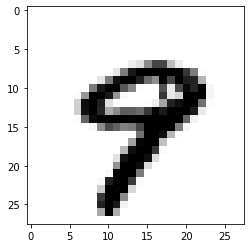

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Sample Data from the test set: ")
#plt.imshow(x_test[9].reshape(28,28)) #컬러 출력
plt.imshow(x_test[9].reshape(28,28), cmap="Greys")  #cmap = "Greys"로 흑백 출력
print("Lable: ", y_test[9])

#DARA Preprocessing & DATA Normalization

In [0]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255     # 0~1사이의 실수

#BUILDING THE CNN




In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

model = models.Sequential()

In [0]:
###Convolultion###
#32 : convolution 필터 수
#(3,3) : convolution 커널(행, 열)
#input_shape : 입력형태 (모델의 첫 레이어에서만 정의하면 됨 나머지 레이어는 그 전 레이어의 output이 input으로 들어와서 input_shape정할 필요 없음) 

###activation function###
#relu : hidden layer에 주로 사용 (avoid negative value)
#sigmoid : 이진 분류 문제에서 output layer에 주로 사용
#softmax : 다중 클래스 분류에서 output layer에 주로 사용



model.add(layers.Convolution2D(32, (3,3), input_shape= (28, 28, 1), activation = "relu"))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Convolution2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64,  activation='relu'))
model.add(layers.Dense(10,  activation='sigmoid'))

In [0]:
#metrics : 모델 평가 지표
#loss : loss  function  여기선 다중 클래스 문제이므로 categorical_crossentropy사용함
#optimizer : 최적의 가중치를 찾는데 사용되는 최적화 알고리즘 (경사 하강법 알고리즘 중 하나인 adam사용)
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [131]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               409856    
_________________________________________________________________
dense_16 (Dense)             (None, 64)              

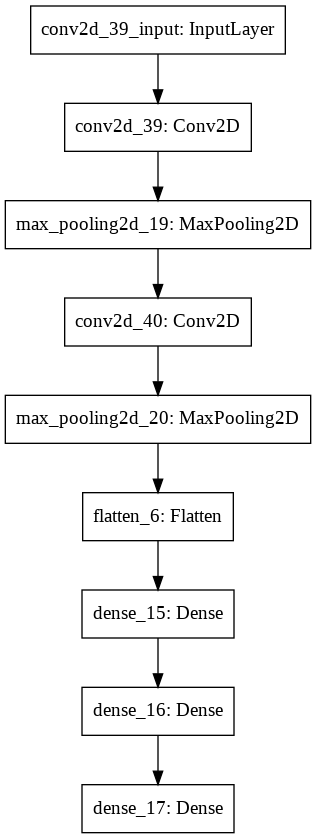

In [135]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')

In [142]:
#epochs : iteration
model.fit(x = x_train, y = y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1412 - accuracy: 0.9556
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0334 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0143 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - accuracy: 0.9971
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

In [147]:
#Evaluating the classifier
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test accuracy: ",test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 0.9921
test accuracy:  0.9921000003814697


In [154]:
'''
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes = True).create(prog='dot', format='svg'))

CNN 모델을 좀 더 보기 편하게 가시화하는 코드인데 일단 현재는 에러뜸 
'''

"\nfrom IPython.display import SVG\nfrom keras.utils.vis_utils import model_to_dot\n\nSVG(model_to_dot(model, show_shapes = True).create(prog='dot', format='svg'))\n\nCNN 모델을 좀 더 보기 편하게 가시화하는 코드인데 일단 현재는 에러뜸 \n"